In [ ]:
# 3D - CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DL_Project

/content/drive/MyDrive/DL_Project



## 1. # feature Maps

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=8, kernel_size=7, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=16, kernel_size=5, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=32, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/n_fea_sub.png', dpi=400)  
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 8)     2752      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 16)     16016     
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 16)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 32)       13856     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 32)       0         
_________________________________________________________________
batch_nor

KeyboardInterrupt: ignored

** Supra **

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 32)    11008     
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 64)     256064    
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 128)      221312    
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 128)      0         
_________________________________________________________________
batch_nor

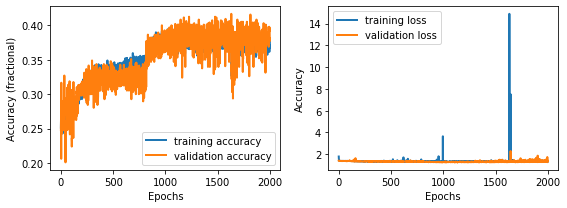

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=32, kernel_size=7, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=64, kernel_size=5, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=128, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/n_fea_supra.png', dpi=400)  
plt.show()


## Kernel Sizes
sub

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 31, 31, 18, 16)    448       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 15, 15, 8, 32)     13856     
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 7, 7, 3, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_nor

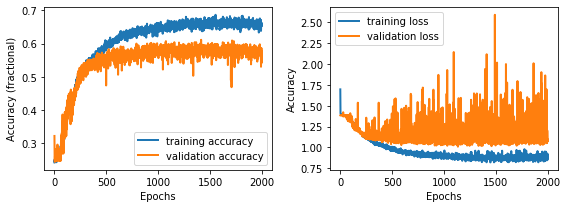

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=3, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=32, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/ken_size_sub.png', dpi=400)  
plt.show()


**Supra**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 28, 28, 15, 16)    11680     
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 11, 11, 5, 32)     175648    
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 5, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 5, 5, 2, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 2, 2, 1, 64)       0         
_________________________________________________________________
batch_nor

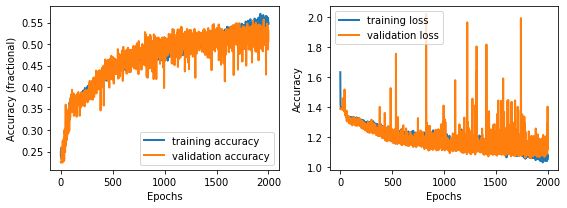

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=9, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=32, kernel_size=7, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/ken_size_supra.png', dpi=400)  
plt.show()


# Dropout 
sub

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 16)    5504      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 32)     64032     
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_nor

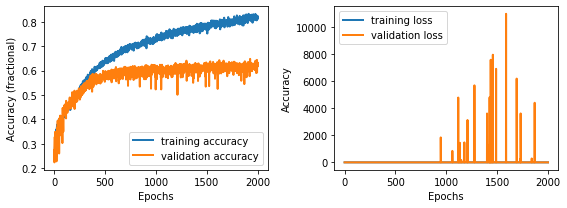

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

act = 'relu'
drp_out = 0.3
l_alpha = 0.01
# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=7, strides=2, activation=act)(inputs)
    y = layers.Conv3D(filters=32, kernel_size=5, strides=2, activation=act)(y)
    y = layers.Dropout(drp_out)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation=act)(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=128, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=64, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/ken_size_supra.png', dpi=400)  
plt.show()


supra

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

act = 'relu'
drp_out = 0.7
l2_alpha = 0.02
# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=7, strides=2, activation=act)(inputs)
    y = layers.Conv3D(filters=32, kernel_size=5, strides=2, activation=act)(y)
    y = layers.Dropout(drp_out)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation=act)(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=128, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=64, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/ken_size_supra.png', dpi=400)  
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 16)    5504      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 32)     64032     
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_nor

KeyboardInterrupt: ignored

extra

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# X = pickle.load(open("X_esm_rev_2000.pickle", "rb"))
# y = pickle.load(open("y_esm_rev_2000.pickle", "rb"))
X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

act = 'relu'
drp_out = 0.3
l2_alpha = 0.02
# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=3, strides=1, activation=act)(inputs)
    y = layers.Conv3D(filters=32, kernel_size=3, strides=1, activation=act)(y)
    y = layers.Dropout(drp_out)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=1, activation=act)(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=128, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    y = layers.Dense(units=64, activation=act)(y)
    y = layers.Dropout(drp_out)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/ken_size_supra.png', dpi=400)  
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 62, 62, 35, 16)    448       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 60, 60, 33, 32)    13856     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 33, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 58, 58, 31, 64)    55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 29, 29, 15, 64)    0         
_________________________________________________________________
batch_nor

ResourceExhaustedError: ignored

In [ ]:
# nsamples, nx, ny, nz, c = X.shape
# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
X.shape

(6000, 151552)

In [ ]:
y_rus.shape[0]
X_rus_rcon = X_rus.reshape(y_rus.shape[0], nx, ny, nz, c)
print(X_rus_rcon.shape)

(2168, 64, 64, 37, 1)


(4000, 151552)
(64, 64, 37, 1)


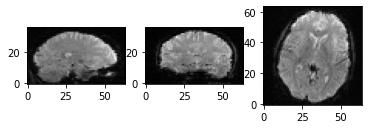

In [ ]:
X.shape
nsamples, nx, ny, nz, c = X.shape
d3_X = X.reshape((nsamples,nx*ny*nz))
print(d3_X.shape)
X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)
print(X_rcon[0].shape)

# import nibabel as nib
# import matplotlib.pyplot as plt

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

vol_img_tensor = X_rcon[0,:,:,:,0]
slice_0 = vol_img_tensor[26, :, :]
slice_1 = vol_img_tensor[:, 30, :]
slice_2 = vol_img_tensor[:, :, 16]
show_slices([slice_0, slice_1, slice_2])
plt.show()

Normalized confusion matrix


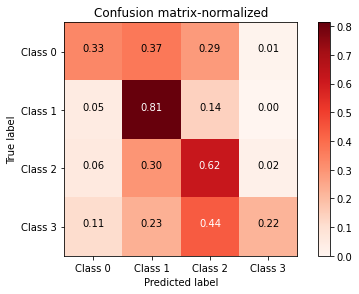

In [ ]:
 import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.ylim([3.5, -.5])
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10 , 10))
plot_confusion_matrix(cnf_matrix, classes=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
                      title='Confusion matrix-normalized')
plt.savefig('3D_CNN_prenorm_reg_conf_mat.png', dpi=400)  
plt.show()

Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 29, 29, 16, 16)    5504      
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 13, 13, 6, 32)     64032     
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 6, 32)     0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 6, 6, 2, 64)       55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 1, 64)       

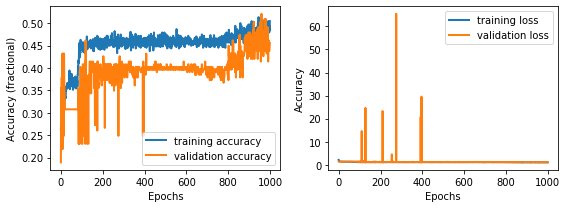

In [ ]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

X = pickle.load(open("X_esm_rev_1052.pickle", "rb"))
y = pickle.load(open("y_esm_rev_1052.pickle", "rb"))
# X = pickle.load(open("X.pickle", "rb"))
# y = pickle.load(open("y.pickle", "rb"))
y = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=7, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=32, kernel_size=5, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="rmsprop", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=1000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('3D_CNN_deeper.png', dpi=400)  
plt.show()


**Optimizer Type**

-Adam

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 16)    5504      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 32)     64032     
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_nor

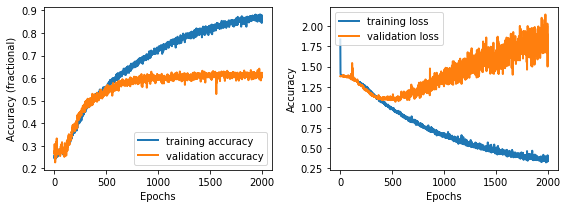

In [3]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=7, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=32, kernel_size=5, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/opt_adam.png', dpi=400)  
plt.show()


**Nadam**

Counter({0: 1500, 1: 1500, 2: 1500, 3: 1500})
Model: "3D_fMRI_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 37, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 29, 29, 16, 16)    5504      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 13, 13, 6, 32)     64032     
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 6, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 6, 6, 2, 64)       55360     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 3, 3, 1, 64)       0         
_________________________________________________________________
batch_nor

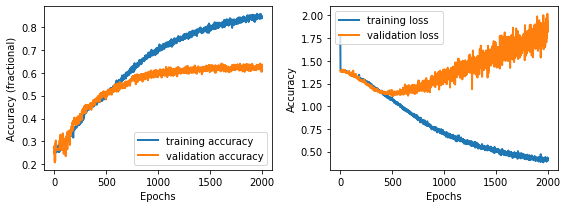

In [3]:
#Start with Architecture from Zhao et al. <=== old
#Revision: Hanh Vu et al fMRI volume classification using a   <=== NEW
#3D convolutional neural network robust to shifted and scaled neuronal
# activations
#Automatic Recognition of fMRI-Derived
#Functional Networks Using 3-D Convolutional Neural Networks
#Start small and expand
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from keras import layers, Input, Model, regularizers
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

X = pickle.load(open("X_rus.pickle", "rb"))
y = pickle.load(open("y_rus.pickle", "rb"))
print(Counter(y))

nsamples = 6000 
nx = 64
ny = 64
nz = 37
c = 1

# d3_X = X.reshape((nsamples,nx*ny*nz))
# print(d3_X.shape)
# X_rcon = d3_X.reshape(nsamples, nx, ny, nz, c)

# rus = RandomUnderSampler(random_state=42) 
# # resampling X, y
# X_rus, y_rus = rus.fit_resample(X, y)
X_rus_rcon = X.reshape(X.shape[0], nx, ny, nz, c)
# print(Counter(y_rus))
y_rus = to_categorical(y)

# X = X/255.0

# print(np.max(X))  
# X = X/(np.max(X)/2)

X_train, X_test, y_train, y_test = train_test_split( X_rus_rcon, y_rus, test_size=0.20, random_state=42)

def define_model(input_size = [64, 64, 37]):
    inputs = Input((input_size[0], input_size[1], input_size[2], 1))
    y = layers.Conv3D(filters=16, kernel_size=7, strides=2, activation='relu')(inputs)
    y = layers.Conv3D(filters=32, kernel_size=5, strides=2, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Conv3D(filters=64, kernel_size=3, strides=2, activation='relu')(y)
    y = layers.MaxPool3D(pool_size=2)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Flatten()(y)
    y = layers.Dense(units=512, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=128, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    y = layers.Dense(units=64, activation='relu')(y)
    y = layers.Dropout(0.5)(y) 
    # y = layers.Dense(units=16, activation='relu')(y)
    # y = layers.Dropout(0.5)(y)
    outputs = layers.Dense(units=4, activation='softmax')(y)
    model = Model(inputs, outputs, name='3D_fMRI_CNN') # model definition
    return model

model = define_model()
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="nadam", metrics=['accuracy']) #rmsprop

# define the checkpoint
filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, batch_size=50, epochs=2000, validation_split=0.2)
model.save(filepath)

print(history.history.keys())
# print(model.summary())


#Evaluate
from sklearn.metrics import classification_report 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
y_pred = model.predict(X_test, batch_size=300)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'],linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training loss', 'validation loss'], loc='best')
plt.tight_layout()
plt.savefig('Figures/opt_nadam.png', dpi=400)  
plt.show()


Normalized confusion matrix


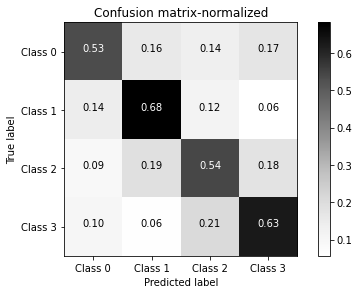

In [8]:
 import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.ylim([3.5, -.5])
    

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10 , 10))
plot_confusion_matrix(cnf_matrix, classes=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
                      title='Confusion matrix-normalized')
plt.savefig('best_Nadam.png', dpi=400)  
plt.show()